<a href="https://colab.research.google.com/github/Arainal0112/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 10 – GLOBAL THRESHOLDING

- Nama : Arainal Aldiansyah
- Kelas : TI - 3C
- Absen : 3

## Mwnghubungkan dengan google drive

In [ ]:
from google.colab import drive

#Akses google drive
drive.mount('/content/drive')

Mounted at /content/drive


## install pytesseract

In [ ]:
!pip install pytesseract

## Import library

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

## 3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

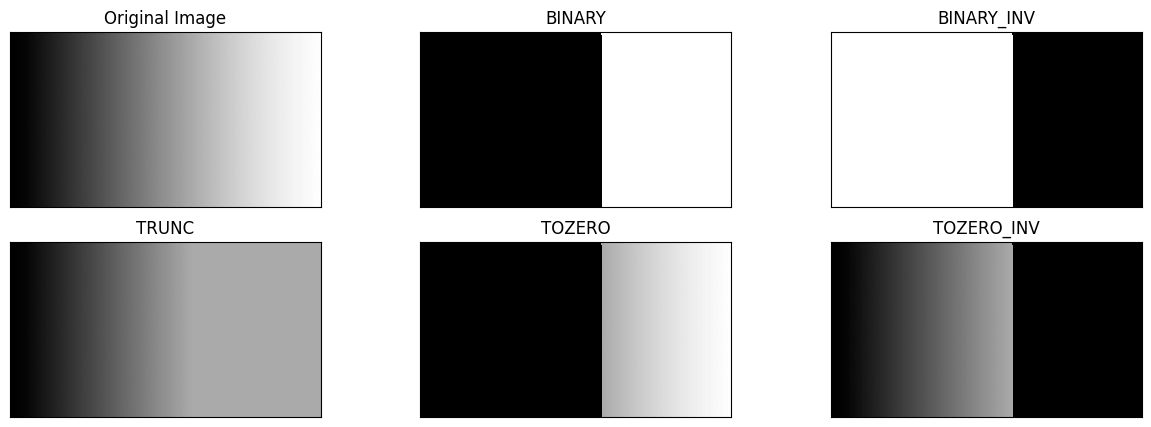

In [ ]:

from PIL import Image

# Baca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/image_thres/gradient.jpg')

thresh = 170  # Nilai threshold yang ditentukan

# 1. BINARY
thresh_binary = np.zeros_like(img)
thresh_binary[img >= thresh] = 255

# 2. BINARY Inverted
thresh_binary_inv = np.zeros_like(img)
thresh_binary_inv[img < thresh] = 255

# 3. TRUNCATE
thresh_trunc = np.copy(img)
thresh_trunc[img > thresh] = thresh

# 4. Threshold To Zero
thresh_tozero = np.copy(img)
thresh_tozero[img < thresh] = 0

# 5. Threshold To Zero – Inverted
thresh_tozero_inv = np.copy(img)
thresh_tozero_inv[img >= thresh] = 0

# Menampilkan hasil
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


## 4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

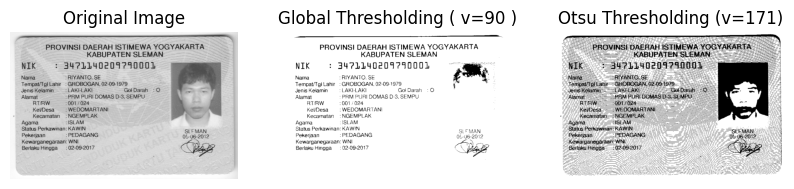

Nilai threshold dari Otsu's Thresholding: 171


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi Global Thresholding
def global_thresholding(image, threshold):
    binary = np.zeros_like(image)
    binary[image > threshold] = 255
    return binary

def otsu_thresholding(image):
    # Normalisasi histogram
    hist = np.histogram(image, bins=256, range=(0, 256))[0].astype(float)
    hist /= hist.sum()

    maximum = 0
    threshold = 0
    sum_b = 0
    sum_f = np.dot(np.arange(256), hist)

    # Iterasi melalui semua nilai ambang (t)
    for t in range(256):
        # Hitung probabilitas piksel latar belakang (w_b) dan objek (w_f)
        w_b = np.sum(hist[:t])
        w_f = 1 - w_b

        # Cek jika salah satu probabilitas adalah nol, lanjutkan ke ambang berikutnya
        if w_b == 0 or w_f == 0:
            continue

        # Hitung rata-rata latar belakang (m_b) dan objek (m_f)
        sum_b += t * hist[t]
        m_b = sum_b / w_b
        m_f = (sum_f - sum_b) / w_f

        # Hitung varian antar kelas (between-class variance)
        between_class_variance = w_b * w_f * (m_b - m_f) ** 2

        # Jika varian antar kelas lebih besar dari yang sebelumnya, perbarui ambang
        if between_class_variance > maximum:
            maximum = between_class_variance
            threshold = t

    # Kembalikan nilai ambang Otsu yang dihitung
    return threshold

# Path file gambar
img_ktp = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')
image = cv2.cvtColor(img_ktp, cv2.COLOR_BGR2GRAY)

# Global Thresholding dengan v=90
global_threshold = global_thresholding(image, 90)

# Otsu's Thresholding
otsu_threshold = otsu_thresholding(image)

# Tampilkan gambar dan hasil thresholding
plt.figure(figsize=(10, 4))

otsu_binary = np.zeros_like(image)
otsu_binary[image > otsu_threshold] = 255


titles = ['Original Image', f'Global Thresholding ( v=90 )', f'Otsu Thresholding (v={otsu_threshold})']
images = [image, global_threshold, otsu_binary]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()
# Otsu's Thresholding
otsu_threshold = otsu_thresholding(image)
print("Nilai threshold dari Otsu's Thresholding:", otsu_threshold)



## 5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:
  - anda dapat gunakan cv.calcHist untuk menampilkan histogram.
  - Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html
  - Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment)

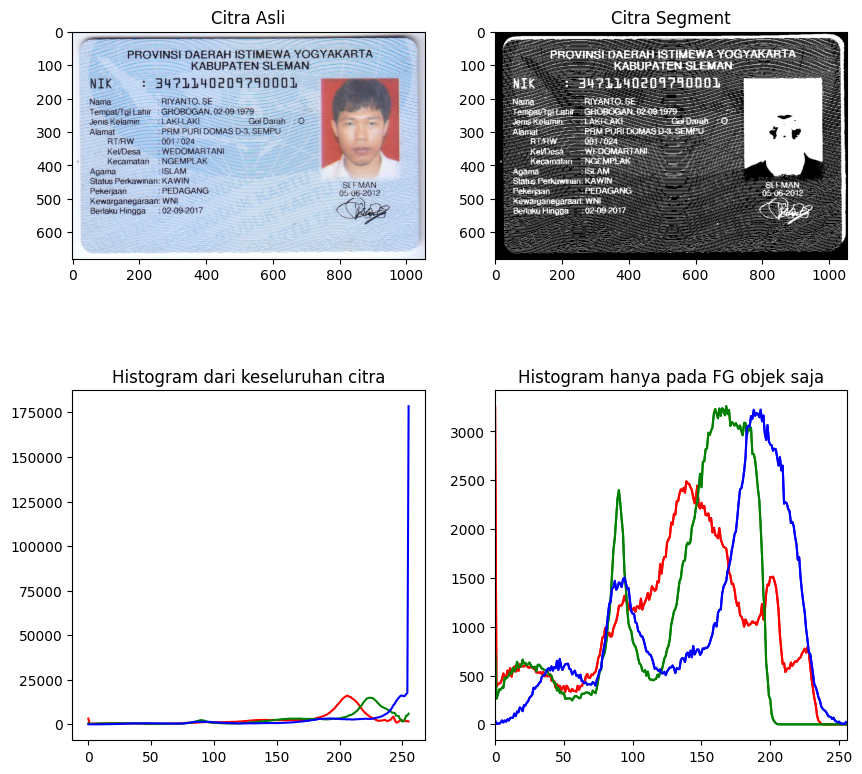

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256])

    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256])

    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()

## 6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)


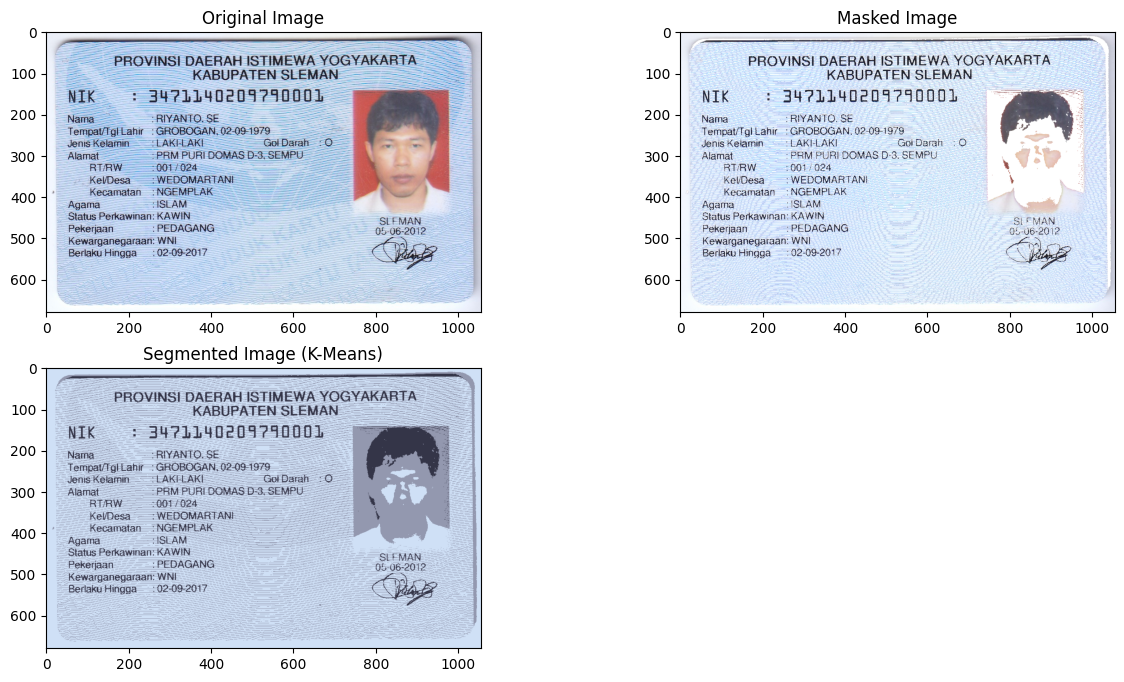

In [ ]:
image = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(image)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(image.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(image.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(image)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

## Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.

### 1. Install PIP OCR

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


### 2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()


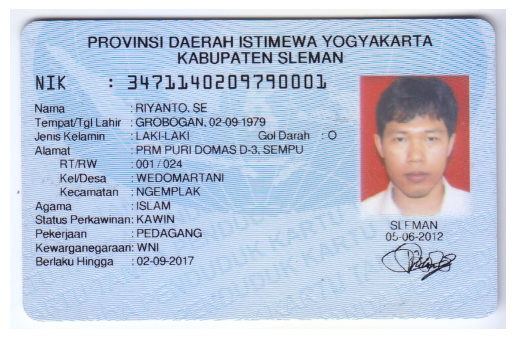

Teks Hasil Pembacaan:
 

 



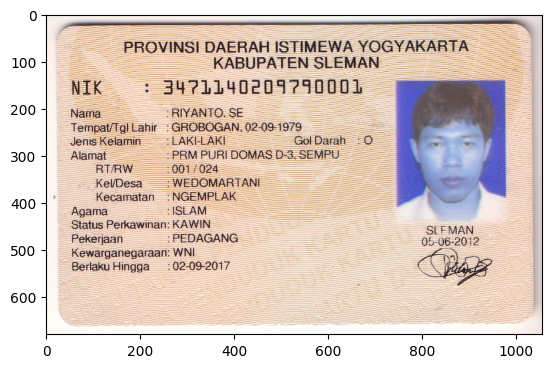

In [ ]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Baca gambar dari file
image = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')

# Langkah 1: Menambahkan axis dan menampilkan gambar
plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Langkah 2: Deteksi teks pada gambar
# Opsi lainnya dapat digunakan untuk meningkatkan akurasi, seperti pengaturan konfigurasi (config) dan pemrosesan praproses (preprocessing).
detected_text = pytesseract.image_to_string(image)


# Tampilkan kotak deteksi teks pada gambar
h, w, _ = image.shape
boxes = pytesseract.image_to_boxes(image)
for b in boxes.splitlines():
    b = b.split()
    x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(image, (x, h - y), (x2, h - y2), (0, 255, 0), 2)

# Tampilkan gambar dengan kotak deteksi teks
plt.imshow(image)

# Langkah 3: Menampilkan teks hasil pembacaan
print("Teks Hasil Pembacaan:")
print(detected_text)